# Polynomial Interpolation – Methods

TMA4125 Vår 2022

This notebook accompanies the slides [02-Polynomial-interpolation-methods.pdf](https://www.math.ntnu.no/emner/TMA4125/2022v/lecture-notes/02-Polynomial-interpolation-methods.pdf).

## Lagrange interpolation

From slide 12 we start here with looking at the cardinal functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

In [2]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

In [3]:
def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`). 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

## Example 1
Let‘s reiterate the example from the beginning where we sampled $cos(\frac{π}{2}x)$ - this is for you to check yourself. The following code just reproduces the image we have on slide 4.

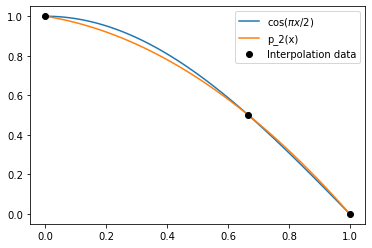

In [4]:
# Interpolation data
xdata = [0,2/3., 1]
ydata = [1, 1/2., 0]
# Interpolation polynomial
p2 = lambda x : (-3*x**2 -x + 4)/4.
    
# Grid points for plotting
x = np.linspace(0,1,100)
y = p2(x)
    
# Original function
f = np.cos(pi*x/2)
    
plt.plot(x,f, x,y, xdata, ydata, "ok")
plt.legend(['$\cos(\pi x/2)$', 'p_2(x)', 'Interpolation data'])

The cardinal functions look like this.

In [ ]:
# Plot the cardinal functions of this example yourself here

### Example 2

The second example is the one from Slide 11. We want to investigate how the interpolation polynomial is formed, by looking at the single summands in

$p_2(x) = \displaystyle\sum_{i=0}^2 y_i\ell_i(x)$.

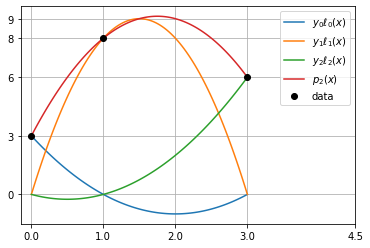

In [5]:
# Interpolation data
xdata = [0, 1, 3]
ydata = [3, 8, 6]
    
# Grid points for plotting
x = np.linspace(0,3,100)

li = cardinal(xdata,x)
p2 = lagrange(ydata,li)

plt.plot(x, ydata[0]*li[0], x, ydata[1]*li[1], x, ydata[2]*li[2], x, p2, xdata, ydata, "ok")
plt.legend(['$y_0\ell_0(x)$', '$y_1\ell_1(x)$', '$y_2\ell_2(x)$', '$p_2(x)$', 'data'])
plt.xticks([0,1,2,3,4.5])
plt.yticks([0,3,6,8,9])
plt.grid(True)

## Newton Interpolation

From slide 23 we can implement the following.

In [6]:
def divdiff(xdata,ydata):
    """
    divdiff(xdata, ydata)
    Compute all Newton divided differences 
    Input:
      * `xdata`, array with the nodes x_i
      * `ydata`, of the y-values of the interpolation points.
    Output: a table (matrix) of divided differences
    """
    n = len(xdata)
    F = np.zeros((n,n))
    F[:,0] = ydata             # Array for the divided differences
    for j in range(n):
        for i in range(n-j-1):
            F[i,j+1] = (F[i+1,j]-F[i,j])/(xdata[i+j+1]-xdata[i])
    return F                    # Return all of F for inspection. 
                                # Only the first row is necessary for the
                                # polynomial.

def newton_interpolation(F, xdata, x):
    """
    newton_interpolation(F, xdata, x)
    Compute the newton interpolation polynomial
    Input:
      * `F` - the Newton divided differences `divdiff(xdata,ydata)` returns
      * `xdata`, array with the nodes x_i
      * x, array or a scalar of values in which the interpolation polynomial is evaluated.
    """
    n, m = np.shape(F)
    xpoly = np.ones(len(x))               # to store (x-x[0])(x-x[1])...
    newton_poly = F[0,0]*np.ones(len(x))  # The Newton polynomial
    for j in range(n-1):
        xpoly = xpoly*(x-xdata[j])
        newton_poly = newton_poly + F[0,j+1]*xpoly
    return newton_poly

We repeat our introductionary example

In [7]:
# Interpolation data
xdata = [0, 2/3, 1]
ydata = [1, 1/2, 0]

F = divdiff(xdata,ydata)
print(F)

[[ 1.   -0.75 -0.75]
 [ 0.5  -1.5   0.  ]
 [ 0.    0.    0.  ]]


Let‘s compare this to the coefficients we computed before
$$
\begin{array}{c|cccc}
0 & 1 & \\
  &        & -3/4 & \\
2/3 & 1/2 &            &  -3/4 \\
&        & -3/2 &   \\
1   & 0 &
\end{array}
$$

In [ ]:
x = np.linspace(0,1,101)
p = newton_interpolation(F, xdata, x)

plt.plot(x, p, xdata, ydata, "ok")
plt.title('The interpolation polynomial p(x)')
plt.grid(True)
plt.xlabel('x');